## Marciniak, Duncan, and Hu (2002): _Mechanics of Sheet Metal Forming_.
### Exercise 5.2.

Figure shows a 100 mm length of a tensile test-piece in which 10 mm has a
width of 12.4 mm and the remainder 12.5 mm. The thickness is uniform at the start, $t_0 =
1.2$ mm. The material obeys an effective stress strain law $\overline\sigma = 750 \overline\varepsilon^{0.22}$ MPa. Assuming
that each length deforms in uniaxial tension, determine the maximum load and the final
length of a 20 mm gauge length in the wider section and the maximum strain in this
section.

<img src="marciniak_ex5_2.png" alt="Dimensions of test-piece for Exercise 5.2" width="320"/>

Figure. Dimensions of test-piece for Exercise 5.2.



### Solutions

Let's call A the wide zone and B the narrow one. The maximum force (diffuse necking) will occur in B. For a potential law $\overline\sigma = K\overline\varepsilon^n$, the plastic instability can be expressed as:
$$
\varepsilon_{1,\text{B}} = n
$$

#### Procedure

1. Calculate the strains in B ($\varepsilon_{2,\text{B}}$, $\varepsilon_{3,\text{B}}$, $\overline\varepsilon_{\text{B}}$) by the uniaxial tension condition: $\alpha=0$, $\beta=-1/2$.
    $$
    \varepsilon_{2,\text{B}} = \varepsilon_{3,\text{B}} = -n/2 \quad , \quad
    \overline\varepsilon_\text{B} = \varepsilon_{1,\text{B}} = n
    $$

Execute the cell below to perform the calculations:

In [1]:
import math

w0A = 12.5
w0B = 12.4
t0 = 1.2
K = 750
n = 0.22
seff = lambda eeff: K*eeff**n     # efective stress seff as a function of the effective strain eeff

alpha = 0
beta = -1/2

e1B = n
e2B = -n/2
e3B = -n/2
eB = n
print("e1B = %.3f, e2B = %.3f, e2B = %.3f, eB = %.3f" % (e1B, e2B, e3B, eB))

e1B = 0.220, e2B = -0.110, e2B = -0.110, eB = 0.220


2. Calculate the width and thickness in B.
    $$
    t_B = t_0 \exp{(\varepsilon_{3,\text{B}})} = t_0 \text{e}^{-n/2} \\
    w_B = w_{0,\text{B}} \exp{(\varepsilon_{2,\text{B}})} = w_{0,\text{B}} \text{e}^{-n/2} 
    $$



In [2]:
tB = t0*math.exp(e3B)
wB = w0B*math.exp(e2B)
print("tB = %.3f mm, wB = %.3f mm" % (tB, wB))

tB = 1.075 mm, wB = 11.108 mm


3. Calculate the effective stress and the major stress in B.
$$
\overline\sigma_\text{B} = K\overline\varepsilon_\text{B}^n = K \, n^n
$$

$$
\alpha = 0 \rightarrow \sigma_{1,\text{B}} =\overline\sigma
$$

In [3]:
sB = seff(eB)
s1B = sB
print("sB = %.1f MPa, s1B = %.1f MPa" % (sB, s1B))

sB = 537.5 MPa, s1B = 537.5 MPa


4. Calculate the applied force by equilibrium with the stresses in B.
    $$
    F_1 = \sigma_{1,\text{B}} \, t_\text{B} \, w_\text{B} = K \, n^n \cdot t_0 \text{e}^{-n/2} \cdot w_{0,\text{B}} \text{e}^{-n/2} =  K t_0 w_{0,\text{B}} \cdot n^n \text{e}^{-n} 
    $$


In [4]:
F1 = K*n**n * t0*w0B*math.exp(-n)
print('F1 = %.2f kN' % (F1/1000))

F1 = 6.42 kN


5. The equilibrium in A will provide an equation for the calculation of major strain $\varepsilon_{1,\text{A}}$.

Force in A:
$$ F_1 = \sigma_{1,\text{A}} \, t_\text{A} \, w_\text{A} = K \, \varepsilon_{1,A}^n \cdot t_0 \text{e}^{-\varepsilon_{1,A}/2} \cdot w_{0,\text{A}} \text{e}^{-\varepsilon_{1,A}/2} =  K t_0 w_{0,\text{A}} \cdot \varepsilon_{1,A}^n \text{e}^{-\varepsilon_{1,A}} $$

where the material at A is also in uniaxial tension condition ($\alpha=0$, $\beta=-1/2$ $\rightarrow$ $\varepsilon_{2,A}=\varepsilon_{3,A}=-\varepsilon_{1,A}/2$).

Force balance in A and B:
$$ w_{0,\text{A}} \varepsilon_{1,A}^n \text{e}^{-\varepsilon_{1,A}} = w_{0,\text{B}}  n^n \text{e}^{-n} $$

In [5]:
# solving the last equation with function scipy.optimize.fsolve

from scipy.optimize import fsolve

func = lambda x : w0A*x**n*math.exp(-x) - w0B*n**n*math.exp(-n)
e1A = fsolve(func, 0.2)
print('e1A = %.3f' % e1A)

e1A = 0.166


In [6]:
# An alternative method is to iterate over e1A until the force F1 is reached

F1A = lambda x: K*t0*w0A * x**n * math.exp(-x)

e1A = n
print('Trial and error for the calculation of e1A until F1 = %.0f N is reached:' % F1)
print('  e1A = %.3f --> F1 = %.0f N' % (e1A, F1A(e1A)))
e1A = 0.15
print('  e1A = %.3f --> F1 = %.0f N' % (e1A, F1A(e1A)))
e1A = 0.17
print('  e1A = %.3f --> F1 = %.0f N' % (e1A, F1A(e1A)))
e1A = 0.166
print('  e1A = %.3f --> F1 = %.0f N' % (e1A, F1A(e1A)))
print('Solution: e1A = %.3f' % e1A)

Trial and error for the calculation of e1A until F1 = 6419 N is reached:
  e1A = 0.220 --> F1 = 6471 N
  e1A = 0.150 --> F1 = 6379 N
  e1A = 0.170 --> F1 = 6427 N
  e1A = 0.166 --> F1 = 6419 N
Solution: e1A = 0.166


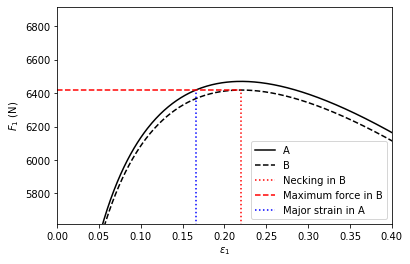

In [7]:
from ex5_2 import *
plot_force(K, n, t0, w0A, w0B, F1, e1A)

6. Calculate the final length of a $l_{0,\text{A}} = 20$ mm gauge length in A:
    $$
    l_A = l_{0,\text{A}} \exp{(\varepsilon_{1,\text{A}})}
    $$

In [8]:
l0A = 20
lA = l0A*math.exp(e1A)
print('Gauge length: l0A = 20 mm --> lA = %.1f mm' % lA)

Gauge length: l0A = 20 mm --> lA = 23.6 mm
